[Этот ноутбук в колабе](https://colab.research.google.com/drive/1RsZvw4KBGn5U5Aj5Ak7OG2pHx6z1OSlF)

Введение:

* [Про тензоры в pytorch](https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/tensor_tutorial.ipynb)
* [Про автоматическое дифференцирование и что такое .backwards()](https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/autograd_tutorial.ipynb)

### Генерируем датасет

In [0]:
NUM_FEATURES = 2
NUM_SAMPLES = 1000

In [0]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = NUM_SAMPLES,
                           n_features = NUM_FEATURES,
                           n_informative = NUM_FEATURES,
                           n_redundant = 0,
                           n_classes = 2,
                           n_clusters_per_class = 1,
                           class_sep = 0.75,
                           random_state = 123)

In [3]:
len(X)

1000

In [4]:
X[0]

array([-1.12038312, -0.78656935])

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

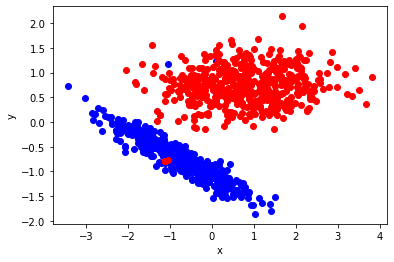

In [6]:
y = y.reshape(-1, 1)

ones = np.where(y == 1)   # индексы объектов класса '1'
zeros = np.where(y == 0)  # индексы объектов класса '0'

plt.xlabel('x')
plt.ylabel('y')
plt.plot(X[ones, 0], X[ones, 1], 'ob',
         X[zeros, 0], X[zeros, 1], 'or');

### Зададим нейронку

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [12]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x


net = Net()
print(net)

Net(
  (fc1): Linear(in_features=2, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)


In [13]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

4
torch.Size([10, 2])


Прогоняем один объект:

In [14]:
inp = torch.tensor(X[0]).float().unsqueeze(0)
inp

tensor([[-1.1204, -0.7866]])

In [15]:
out = net(inp)
print(out)

tensor([[0.4919]], grad_fn=<SigmoidBackward>)


### Определяем функцию потерь

Функция потерь:

In [0]:
criterion = nn.BCELoss()

In [26]:
target = torch.tensor(y[0]).float()
target

tensor([1.])

In [22]:
inp

tensor([[-1.1204, -0.7866]])

In [28]:
output = net(inp)
print(output)
loss = criterion(output, target)
print(loss)

tensor([[0.4919]], grad_fn=<SigmoidBackward>)
tensor(0.7094, grad_fn=<BinaryCrossEntropyBackward>)


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


Постмотрим на функции за лоссом.

In [30]:
print(loss.grad_fn)  # BCELoss
print(loss.grad_fn.next_functions[0][0])  # Sigmoid

### Backprop

In [31]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.fc1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.fc1.bias.grad)

conv1.bias.grad before backward
None
conv1.bias.grad after backward
tensor([-0.1101,  0.0000,  0.0932,  0.1526,  0.0000, -0.0769,  0.0000,  0.0000,
        -0.1256, -0.1104])


А теперь сделаем опитимизацию для одного объекта:

In [32]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(inp)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


In [33]:
print(loss)

tensor(0.7094, grad_fn=<BinaryCrossEntropyBackward>)


Попробуем что-то обучить:

In [0]:
in_data = torch.tensor(X).float()

In [0]:
out_data = torch.tensor(y).float()

In [46]:
for i in range(250): # кол-во эпох
    optimizer.zero_grad()
    output = net(in_data)
    loss = criterion(output, out_data)
    loss.backward()
    optimizer.step()
    if i % 50 == 0:
      print(loss)

tensor(0.6264, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5814, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5378, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.4950, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.4535, grad_fn=<BinaryCrossEntropyBackward>)
